In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import Image


import matplotlib.style as style 

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['text.usetex'] = True

In [52]:
filepath = 'data/normal/12.288.csv'

In [59]:
df = pd.read_csv(filepath, names=['tachometer', 'underhang_1', 'underhang_2', 'underhang_3', 'overhang_1', 'overhang_2', 'overhang_3', 'microphone'])

In [60]:
df.head()

,tachometer,underhang_1,underhang_2,underhang_3,overhang_1,overhang_2,overhang_3,microphone
0,4.5595,0.175200,0.287210,-0.017751,-0.41565,0.032459,-0.11218,-0.128140
1,4.6038,-0.051295,-0.194050,-0.060071,-0.41809,0.036547,-0.11043,0.118310
2,4.5703,-0.969080,0.038033,-0.028329,-0.43081,0.041924,-0.14331,-0.071527
3,4.5870,0.891270,0.072973,0.007453,-0.40017,0.041090,-0.11984,0.043445
4,4.5887,-1.716000,-0.329290,-0.033063,-0.50281,0.040474,-0.25270,0.023901


In [160]:
tachometer_signal = df['tachometer']

In [161]:
np.shape(tachometer_signal)

(250000,)

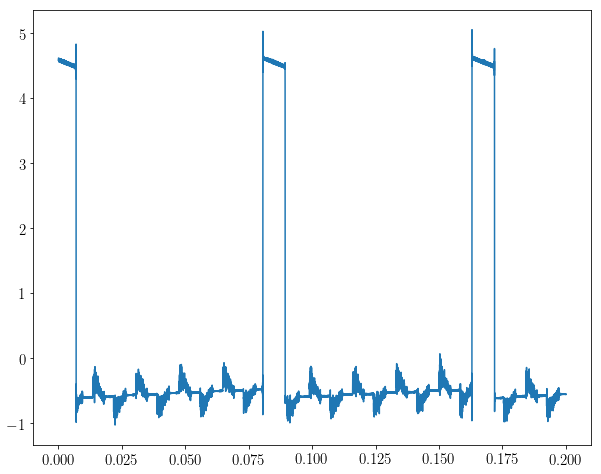

In [162]:
fig, ax1 = plt.subplots()

Fs = 50e3
T = 5
t = np.arange(0, T*Fs)/Fs
ax1.plot(t[1:10000], tachometer_signal[1:10000])

plt.show()

Estimated frequency: 24.20 Hz


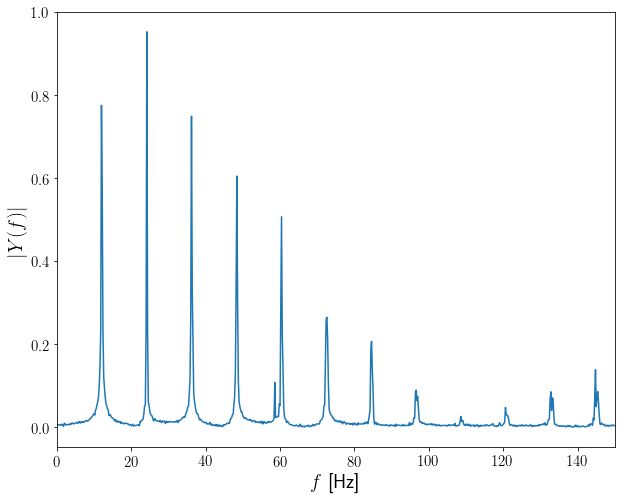

In [163]:
x = tachometer_signal

num_pts = len(underhang_1)
k = np.arange(num_pts)
fs = 50e3

T = num_pts/fs
frq = k/T 

# One side frequency range
num_pts_half = int(num_pts/2)
frq = frq[range(num_pts_half)]

# FFT computing and normalization
X = np.fft.fft(x)/num_pts_half
X = X[range(num_pts_half)]

# Plotting the spectrum
plt.xlim(left=0, right=150)
plt.plot(frq, abs(X)) 
plt.xlabel(r'$f$~[Hz]')
plt.ylabel(r'$|Y(f)|$')
plt.savefig('dft.eps', transparent=True, optimize=True, bbox_inches='tight')

argmax = np.argmax(np.absolute(X))
estimated_freq = frq[argmax]
print(f'Estimated frequency: {estimated_freq:.2f} Hz')

In [149]:
underhang_1 = preprocessing.scale(underhang_1)

In [151]:
underhang_1 = df['underhang_1']

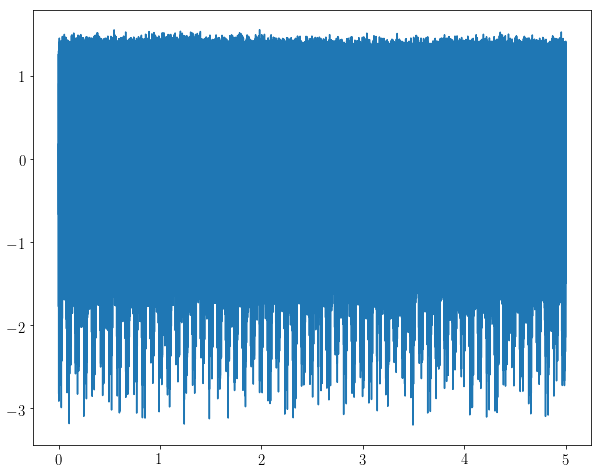

In [105]:
fig, ax1 = plt.subplots()

Fs = 50e3
T = 5
t = np.arange(0, T*Fs)/Fs
ax1.plot(t, underhang_1)

plt.show()

Estimated frequency: 22038.60 Hz


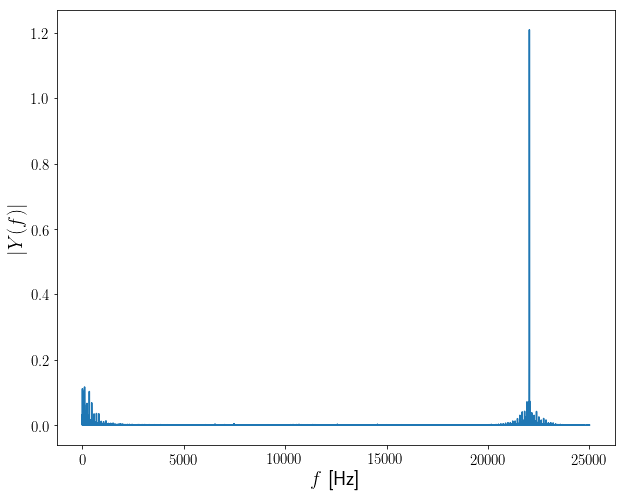

In [152]:
x = underhang_1

num_pts = len(underhang_1)
k = np.arange(num_pts)
fs = 50e3

T = num_pts/fs
frq = k/T 

# One side frequency range
num_pts_half = int(num_pts/2)
frq = frq[range(num_pts_half)]

# FFT computing and normalization
X = np.fft.fft(x)/num_pts_half
X = X[range(num_pts_half)]

# Plotting the spectrum
plt.plot(frq, abs(X)) 
plt.xlabel(r'$f$~[Hz]')
plt.ylabel(r'$|Y(f)|$')

argmax = np.argmax(np.absolute(X))
estimated_freq = frq[argmax]
print(f'Estimated frequency: {estimated_freq:.2f} Hz')

In [156]:
microphone_signal = df['overhang_2']

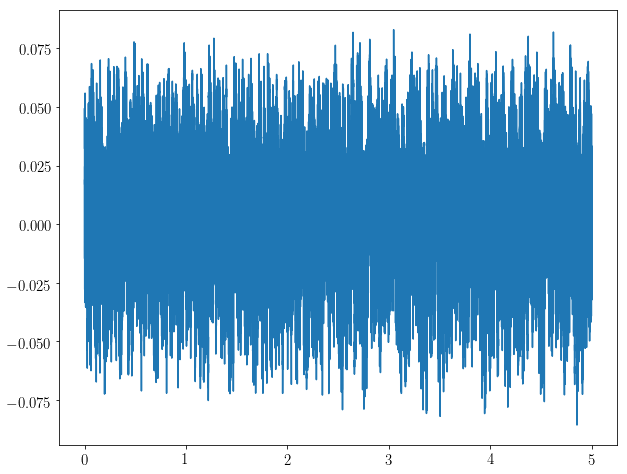

In [157]:
fig, ax1 = plt.subplots()

Fs = 50e3
T = 5
t = np.arange(0, T*Fs)/Fs
ax1.plot(t, microphone_signal)

plt.show()

Estimated frequency: 24.20 Hz


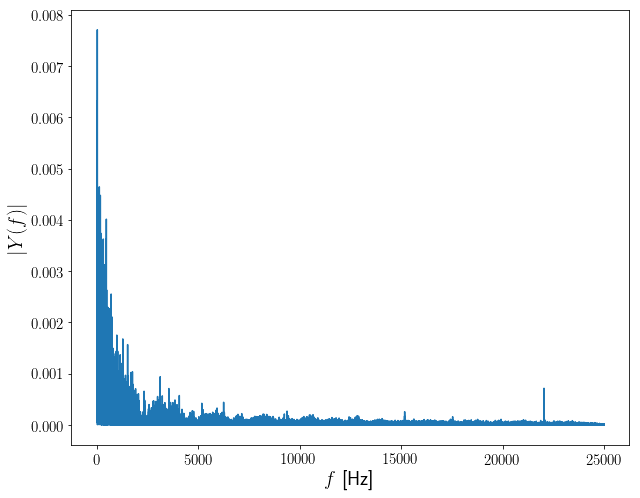

In [158]:
x = microphone_signal

num_pts = len(underhang_1)
k = np.arange(num_pts)
fs = 50e3

T = num_pts/fs
frq = k/T 

# One side frequency range
num_pts_half = int(num_pts/2)
frq = frq[range(num_pts_half)]

# FFT computing and normalization
X = np.fft.fft(x)/num_pts_half
X = X[range(num_pts_half)]

# Plotting the spectrum
plt.plot(frq, abs(X)) 
plt.xlabel(r'$f$~[Hz]')
plt.ylabel(r'$|Y(f)|$')

argmax = np.argmax(np.absolute(X))
estimated_freq = frq[argmax]
print(f'Estimated frequency: {estimated_freq:.2f} Hz')

In [164]:
df.head()

,tachometer,underhang_1,underhang_2,underhang_3,overhang_1,overhang_2,overhang_3,microphone
0,4.5595,0.175200,0.287210,-0.017751,-0.41565,0.032459,-0.11218,-0.128140
1,4.6038,-0.051295,-0.194050,-0.060071,-0.41809,0.036547,-0.11043,0.118310
2,4.5703,-0.969080,0.038033,-0.028329,-0.43081,0.041924,-0.14331,-0.071527
3,4.5870,0.891270,0.072973,0.007453,-0.40017,0.041090,-0.11984,0.043445
4,4.5887,-1.716000,-0.329290,-0.033063,-0.50281,0.040474,-0.25270,0.023901


In [167]:
dic = {}
for signal in ['tachometer', 'underhang_1', 'underhang_2', 'underhang_3', 'overhang_1', 'overhang_2', 'overhang_3', 'microphone']:
    x = df[signal]

    num_pts = len(underhang_1)
    k = np.arange(num_pts)
    fs = 50e3

    T = num_pts/fs
    frq = k/T 

    # One side frequency range
    num_pts_half = int(num_pts/2)
    frq = frq[range(num_pts_half)]

    # FFT computing and normalization
    X = np.fft.fft(x)/num_pts_half
    X = X[range(num_pts_half)]

    argmax = np.argmax(np.absolute(X))
    estimated_freq = frq[argmax]
    dic[signal] = estimated_freq

In [168]:
dic

{'tachometer': 24.2,
 'underhang_1': 22038.6,
 'underhang_2': 22038.6,
 'underhang_3': 22038.6,
 'overhang_1': 24.2,
 'overhang_2': 24.2,
 'overhang_3': 24.2,
 'microphone': 22038.6}

In [169]:
filepath = 'data/normal/13.1072.csv'

In [170]:
df = pd.read_csv(filepath, names=['tachometer', 'underhang_1', 'underhang_2', 'underhang_3', 'overhang_1', 'overhang_2', 'overhang_3', 'microphone'])

In [171]:
dic = {}
for signal in ['tachometer', 'underhang_1', 'underhang_2', 'underhang_3', 'overhang_1', 'overhang_2', 'overhang_3', 'microphone']:
    x = df[signal]

    num_pts = len(underhang_1)
    k = np.arange(num_pts)
    fs = 50e3

    T = num_pts/fs
    frq = k/T 

    # One side frequency range
    num_pts_half = int(num_pts/2)
    frq = frq[range(num_pts_half)]

    # FFT computing and normalization
    X = np.fft.fft(x)/num_pts_half
    X = X[range(num_pts_half)]

    argmax = np.argmax(np.absolute(X))
    estimated_freq = frq[argmax]
    dic[signal] = estimated_freq

In [172]:
dic

{'tachometer': 25.8,
 'underhang_1': 22029.2,
 'underhang_2': 22029.2,
 'underhang_3': 22029.2,
 'overhang_1': 1.2,
 'overhang_2': 12.8,
 'overhang_3': 1.2,
 'microphone': 22029.2}

In [173]:
filepath = 'data/normal/14.336.csv'

In [174]:
df = pd.read_csv(filepath, names=['tachometer', 'underhang_1', 'underhang_2', 'underhang_3', 'overhang_1', 'overhang_2', 'overhang_3', 'microphone'])

In [175]:
dic = {}
for signal in ['tachometer', 'underhang_1', 'underhang_2', 'underhang_3', 'overhang_1', 'overhang_2', 'overhang_3', 'microphone']:
    x = df[signal]

    num_pts = len(underhang_1)
    k = np.arange(num_pts)
    fs = 50e3

    T = num_pts/fs
    frq = k/T 

    # One side frequency range
    num_pts_half = int(num_pts/2)
    frq = frq[range(num_pts_half)]

    # FFT computing and normalization
    X = np.fft.fft(x)/num_pts_half
    X = X[range(num_pts_half)]

    argmax = np.argmax(np.absolute(X))
    estimated_freq = frq[argmax]
    dic[signal] = estimated_freq

In [176]:
dic

{'tachometer': 28.2,
 'underhang_1': 22025.6,
 'underhang_2': 22025.6,
 'underhang_3': 22025.6,
 'overhang_1': 0.8,
 'overhang_2': 4.4,
 'overhang_3': 0.8,
 'microphone': 22025.6}

In [178]:
filepath = 'data/normal/60.416.csv'

In [179]:
df = pd.read_csv(filepath, names=['tachometer', 'underhang_1', 'underhang_2', 'underhang_3', 'overhang_1', 'overhang_2', 'overhang_3', 'microphone'])

In [180]:
dic = {}
for signal in ['tachometer', 'underhang_1', 'underhang_2', 'underhang_3', 'overhang_1', 'overhang_2', 'overhang_3', 'microphone']:
    x = df[signal]

    num_pts = len(underhang_1)
    k = np.arange(num_pts)
    fs = 50e3

    T = num_pts/fs
    frq = k/T 

    # One side frequency range
    num_pts_half = int(num_pts/2)
    frq = frq[range(num_pts_half)]

    # FFT computing and normalization
    X = np.fft.fft(x)/num_pts_half
    X = X[range(num_pts_half)]

    argmax = np.argmax(np.absolute(X))
    estimated_freq = frq[argmax]
    dic[signal] = estimated_freq

In [181]:
dic

{'tachometer': 59.0,
 'underhang_1': 22023.4,
 'underhang_2': 22023.4,
 'underhang_3': 179.2,
 'overhang_1': 1.0,
 'overhang_2': 1.0,
 'overhang_3': 1.0,
 'microphone': 22023.4}